# CarPrice_Assignment Linear Regression

### Import Libraries

In [444]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load Dataset

In [446]:
data=pd.read_csv('data/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data preprocessing

In [448]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [449]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [450]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [451]:
data.duplicated().sum()

0

### Correlation Analysis

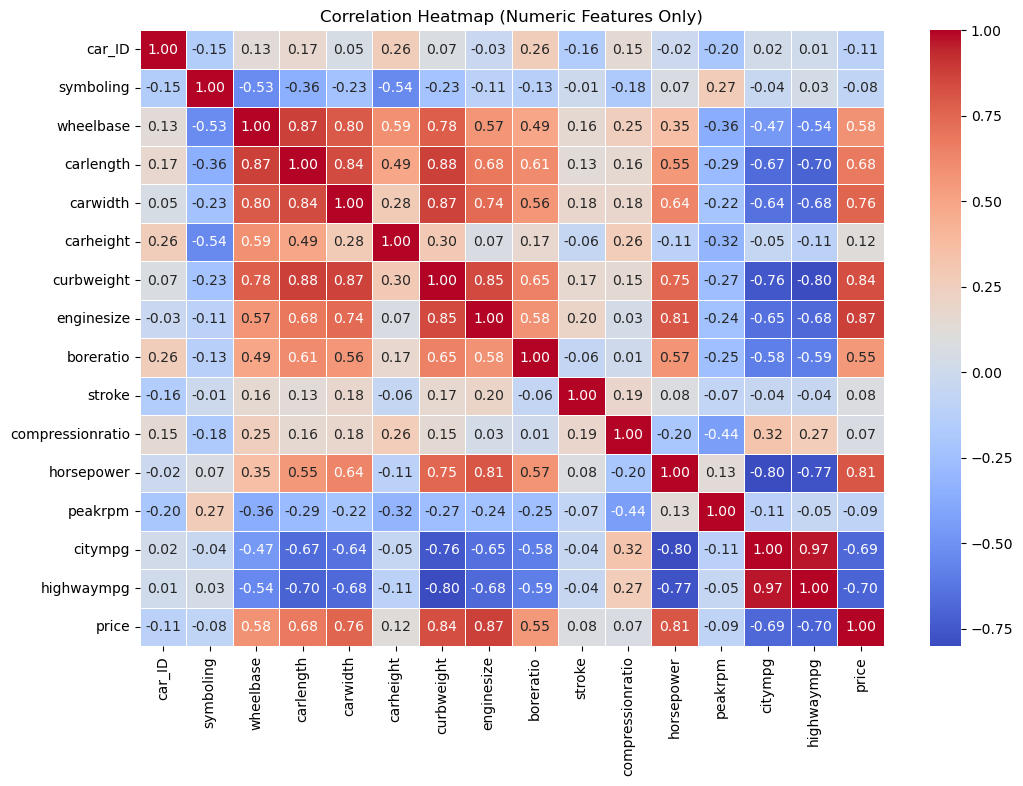

In [576]:
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_data.corr()  # Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


### Data visulization

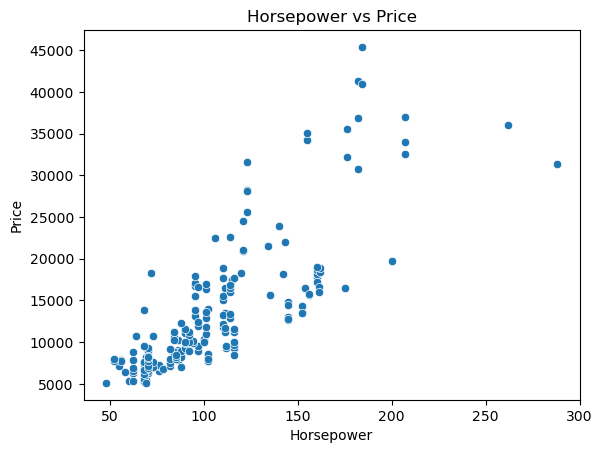

In [455]:
# visualizing horsepower vs price
sns.scatterplot(x=data['horsepower'], y=data['price'])
plt.title("Horsepower vs Price")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()

### Splitting Data into Inputs (X) & Target (Y)

In [457]:
X = data.drop(['price', 'car_ID', 'CarName'], axis=1)  # Features
y = data['price']  # Target

# X = data.iloc[:, :-1]  
# y = data.iloc[:, -1]  

### Label Encoding

In [459]:
label_encoder = LabelEncoder()
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem','cylindernumber']
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

In [460]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

### Scaling

In [462]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5]) 

[[ 1.74347043  0.32879797 -0.46929532  1.13038833 -3.05097525  1.21333041
  -0.12186667 -1.6907718  -0.42652147 -0.84478235 -2.0204173  -0.01456628
  -2.86510549 -0.14747536  0.07444893  0.8695675   0.51907138 -1.83937734
  -0.28834891  0.17448278 -0.26296022 -0.64655303 -0.54605874]
 [ 1.74347043  0.32879797 -0.46929532  1.13038833 -3.05097525  1.21333041
  -0.12186667 -1.6907718  -0.42652147 -0.84478235 -2.0204173  -0.01456628
  -2.86510549 -0.14747536  0.07444893  0.8695675   0.51907138 -1.83937734
  -0.28834891  0.17448278 -0.26296022 -0.64655303 -0.54605874]
 [ 0.133509    0.32879797 -0.46929532  1.13038833 -0.71720687  1.21333041
  -0.12186667 -0.70859588 -0.23151305 -0.19056612 -0.54352748  0.51488192
   1.88688986  1.11220997  0.60404617  0.8695675  -2.40488029  0.68594616
  -0.28834891  1.26453643 -0.26296022 -0.95301169 -0.69162706]
 [ 0.93848971  0.32879797 -0.46929532 -0.88465174  0.44967732 -0.58908071
  -0.12186667  0.17369775  0.2072559   0.13654199  0.23594216 -0.420797

### Splitting Data into Train and Test Sets

In [551]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)

### Linear Regression Modeling

In [553]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predictions

In [555]:
y_pred = model.predict(X_test)

### Model Coefficients & Intercept

In [557]:
coefficients = model.coef_
intercept = model.intercept_
print(f"Model Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

Model Coefficients: [   90.45716609 -3929.98329379    49.00865561  -196.06531705
  -761.99056122   792.88303539  1278.47558716   436.61465682
    22.60435732  1427.04514693   609.28909155   994.79761655
   341.85219872  -149.13704054  4102.81158181  -196.97066782
 -1016.15362598 -1175.89326415 -3167.70976183  1055.84071148
  1009.06527264 -1137.76869773  1209.17441159]
Intercept: 13232.992612555165


### Data Visualization :  the actual vs predicted values

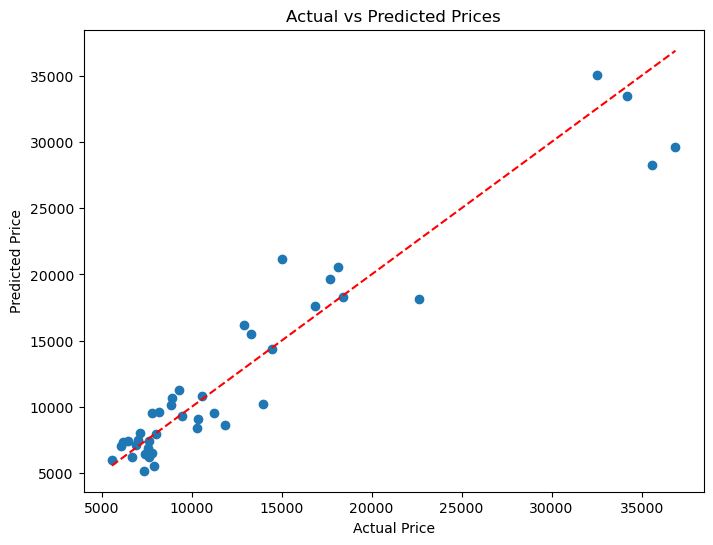

In [559]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect prediction
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


### Performance Metrics for Regression Models: MAE, MSE, and RMSE

In [561]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1809.674638343355
Mean Squared Error (MSE): 6406856.930586139
Root Mean Squared Error (RMSE): 2531.1769852355524


### Create a DataFrame to compare actual vs predicted prices

In [563]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df.head())

      Actual     Predicted
154   7898.0   5508.706012
21    5572.0   6001.140040
198  18420.0  18280.935705
48   35550.0  28238.563713
34    7129.0   7999.527831


### Calculate the R-squared value

In [565]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared Value: {r2}")

R-squared Value: 0.9062153934698567


In [566]:
#END

### Training & Testing score

In [581]:
model = LinearRegression()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
print(f"Training Data R² Score: {train_score}")
test_score = model.score(X_test, y_test)
print(f"Testing Data R² Score: {test_score}")

Training Data R² Score: 0.8681582098546777
Testing Data R² Score: 0.9062153934698567
